# PA 4: Association Analysis - Apriori Algorithm

## Student Details

Student Name and ID:  **Kundana Vaka** - **1001827398**                    


## Submission Instructions


Step 1: Create a folder and name it 'lastname_firstname_yourNetID_PA4'

Step 2: Rename this submission file as 'lastname_firstname_yourNetID_PA4.ipynb' and place it inside the folder 'lastname_firstname_yourNetID_PA4'

Step 3: Rename the updated dataset file 'dataset.csv' and place it inside the folder 'lastname_firstname_yourNetID_PA4'  

Step 4: Your submission folder should include ONLY the following files:
    * lastname_firstname_yourNetID_PA4.ipynb, 
    * dataset.csv,
    * fruits.csv
    * Apriori algorithm


Step 5: Zip this folder and submit it on BB. Your final submission folder name should be 'lastname_firstname_yourNetID_PA4.ZIP'


## Programming Assignment Details

Before you start:
- Be familiar with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Groceries' dataset [01],
* and the Apriori Algorithm [02] (You can use the algorithm provided as reference)

## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Import your Libraries
import pandas as pd
import numpy as np
import csv

### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'Groceries_dataset.csv' to look like the fruits.csv.  Each transaction is at one line with a variable length.  Discard the date attribute from your dataset.  

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


ScreenShot of the fruits.csv


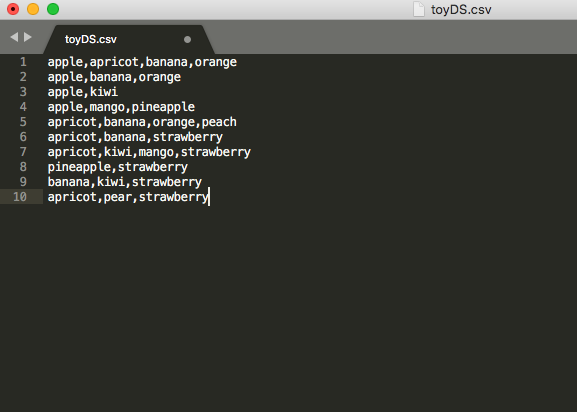

In [3]:
from IPython.display import Image
print ('ScreenShot of the fruits.csv')
Image("SampleScreen01.png")

In [4]:
# # # # # # # # #  Code for Task 1 # # # # # # # # #
# References
# 1) Data Preprocessing - Retrieved from https://www.kaggle.com/dharmikv821/groceries-associate-rule-learning
# 2) Saving list data to csv - Retrieved from https://www.geeksforgeeks.org/python-save-list-to-csv/ 

#read the Groceries_dataset csv file into a Pandas data frame
df_data = pd.read_csv('Groceries_dataset.csv')
# Discard the Date column
df = df_data.drop(['Date'], axis=1)
# one-hot encoding
dummies = pd.get_dummies(df['itemDescription'])
df = df.join(dummies)
item = df.itemDescription.unique()
df = df.groupby(['Member_number'])[item[:]].sum()
df = df.reset_index()
df = df.drop(['Member_number'],axis=1)

# Converting true values to its columns names
temp = df.copy()
for i in range(len(temp)):
    for j in (temp.columns):
        if temp.loc[i,j]>0:
            temp.loc[i,j]=j

num_records = len(temp)
num_attr = len(temp.columns)
temp = temp.values
transactions = []
for i in range(num_records):
    x=[]
    for j in range(num_attr):
        if temp[i,j]!=0:
            x.append(temp[i,j])
    transactions.append(x)

# Save transactions in dataset.csv file
with open('dataset.csv', 'w', newline='') as f: 
    write = csv.writer(f) 
    write.writerows(transactions) 

In [5]:
# # #  Solution  # # #
dataset = pd.read_csv('dataset.csv', sep='\n', header=None)
dataset = dataset[0].str.split(',', expand=True)
dataset.head(7)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,whole milk,yogurt,sausage,pastry,canned beer,misc. beverages,soda,pickled vegetables,salty snack,hygiene articles,...,None,None,None,None,None,None,None,None,None,None
1,whole milk,rolls/buns,beef,frankfurter,sausage,soda,curd,whipped/sour cream,white bread,None,...,None,None,None,None,None,None,None,None,None,None
2,tropical fruit,whole milk,other vegetables,butter,butter milk,sugar,specialty chocolate,frozen vegetables,None,None,...,None,None,None,None,None,None,None,None,None,None
3,rolls/buns,sausage,root vegetables,frozen meals,detergent,dental care,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,packaged fruit/vegetables,chocolate,root vegetables,pastry,canned beer,...,None,None,None,None,None,None,None,None,None,None
5,rolls/buns,margarine,whipped/sour cream,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,whole milk,rolls/buns,frankfurter,chicken,chocolate,bottled water,flour,bottled beer,shopping bags,skin care,...,None,None,None,None,None,None,None,None,None,None


### Task 2: Implement apriory algorithm and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results.
(*) For those that are not familiar with python and coding this could be a quite demanding task.


You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv'. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments. 


In [6]:
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=0.02 and minimum confidence=0.6)')
print ('Case 1 Reasoning: Here we executed Apriory algorithm by choosing minimum support as 0.02 and confidence as 0.60.\n We can notice that the item "whole milk" has the highest support of 0.458 and then "other vegetables" has the second highest support which is 0.377.\n We choose support to eliminate the low support between the frequent item sets and provide a more valid dataset\n whereas confidence helps to determine the occurance of the data item from the frequent data item set confidently.\n')
print ('Case 1 Output:')
%run apriori.py -f dataset.csv -s 0.02 -c 0.6

# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=0.02 and minimum confidence=0.6)
Case 1 Reasoning: Here we executed Apriory algorithm by choosing minimum support as 0.02 and confidence as 0.60.
 We can notice that the item "whole milk" has the highest support of 0.458 and then "other vegetables" has the second highest support which is 0.377.
 We choose support to eliminate the low support between the frequent item sets and provide a more valid dataset
 whereas confidence helps to determine the occurance of the data item from the frequent data item set confidently.

Case 1 Output:


C:\Users\dhair\Desktop\Fall2020\DM-5334\assignments\Sanghrajka_Tanvi_tss5599_PA4\apriori.py:128: DeprecationWarning: 'U' mode is deprecated
  with open(fname, 'rU') as file_iter:


item: ('turkey',) , 0.020
item: ('sugar', 'bottled water') , 0.020
item: ('frozen vegetables', 'whipped/sour cream') , 0.020
item: ('hamburger meat', 'bottled water') , 0.020
item: ('root vegetables', 'chocolate') , 0.020
item: ('yogurt', 'butter milk') , 0.020
item: ('coffee', 'frankfurter') , 0.020
item: ('beef', 'newspapers') , 0.020
item: ('specialty chocolate', 'rolls/buns') , 0.020
item: ('cream cheese ', 'shopping bags') , 0.020
item: ('shopping bags', 'frozen vegetables') , 0.020
item: ('specialty bar', 'rolls/buns') , 0.020
item: ('beef', 'frankfurter') , 0.020
item: ('root vegetables', 'onions') , 0.020
item: ('chicken', 'pip fruit') , 0.020
item: ('domestic eggs', 'brown bread') , 0.020
item: ('yogurt', 'oil') , 0.020
item: ('fruit/vegetable juice', 'whipped/sour cream') , 0.020
item: ('brown bread', 'curd') , 0.020
item: ('domestic eggs', 'whole milk', 'tropical fruit') , 0.020
item: ('pastry', 'bottled water', 'other vegetables') , 0.020
item: ('beef', 'other vegetables', 

In [7]:
print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=0.02 and minimum confidence=0.4)') 
print ('Case 2 Reasoning: Here we executed Apriory algorithm by choosing minimum support as 0.02 and confidence as 0.4.\n In this case we have decresed both the minimum support value and minimum confidence value. \n So we can say that the chance of elements of the frequent item set for being selected is decreased.\n There are many rules displayed in the output with confidence less than 0.4 which imples that the probability of those items being purchased together is very low so they dont need to be placed together.\n And there is support less than 0.02 which implies that they are less likely to be purchased together by the customers.\n')
print ('Case 2 Output:') 
%run apriori.py -f dataset.csv -s 0.02 -c 0.4

# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #
Case 2 (minimum support=0.02 and minimum confidence=0.4)
Case 2 Reasoning: Here we executed Apriory algorithm by choosing minimum support as 0.02 and confidence as 0.4.
 In this case we have decresed both the minimum support value and minimum confidence value. 
 So we can say that the chance of elements of the frequent item set for being selected is decreased.
 There are many rules displayed in the output with confidence less than 0.4 which imples that the probability of those items being purchased together is very low so they dont need to be placed together.
 And there is support less than 0.02 which implies that they are less likely to be purchased together by the customers.

Case 2 Output:


C:\Users\dhair\Desktop\Fall2020\DM-5334\assignments\Sanghrajka_Tanvi_tss5599_PA4\apriori.py:128: DeprecationWarning: 'U' mode is deprecated
  with open(fname, 'rU') as file_iter:


item: ('turkey',) , 0.020
item: ('sugar', 'bottled water') , 0.020
item: ('frozen vegetables', 'whipped/sour cream') , 0.020
item: ('hamburger meat', 'bottled water') , 0.020
item: ('root vegetables', 'chocolate') , 0.020
item: ('yogurt', 'butter milk') , 0.020
item: ('coffee', 'frankfurter') , 0.020
item: ('beef', 'newspapers') , 0.020
item: ('specialty chocolate', 'rolls/buns') , 0.020
item: ('cream cheese ', 'shopping bags') , 0.020
item: ('shopping bags', 'frozen vegetables') , 0.020
item: ('specialty bar', 'rolls/buns') , 0.020
item: ('beef', 'frankfurter') , 0.020
item: ('root vegetables', 'onions') , 0.020
item: ('chicken', 'pip fruit') , 0.020
item: ('domestic eggs', 'brown bread') , 0.020
item: ('yogurt', 'oil') , 0.020
item: ('fruit/vegetable juice', 'whipped/sour cream') , 0.020
item: ('brown bread', 'curd') , 0.020
item: ('domestic eggs', 'whole milk', 'tropical fruit') , 0.020
item: ('pastry', 'bottled water', 'other vegetables') , 0.020
item: ('beef', 'other vegetables', 

Rule: ('soda', 'citrus fruit') ==> ('whole milk',) , 0.492
Rule: ('sausage', 'yogurt') ==> ('other vegetables',) , 0.493
Rule: ('beef', 'rolls/buns') ==> ('other vegetables',) , 0.494
Rule: ('frankfurter',) ==> ('whole milk',) , 0.494
Rule: ('UHT-milk',) ==> ('other vegetables',) , 0.497
Rule: ('pastry', 'whole milk', 'other vegetables') ==> ('rolls/buns',) , 0.497
Rule: ('yogurt', 'pork') ==> ('other vegetables',) , 0.497
Rule: ('margarine', 'rolls/buns') ==> ('other vegetables',) , 0.497
Rule: ('yogurt', 'butter') ==> ('other vegetables',) , 0.497
Rule: ('whole milk', 'chocolate') ==> ('other vegetables',) , 0.497
Rule: ('chicken',) ==> ('whole milk',) , 0.497
Rule: ('citrus fruit',) ==> ('whole milk',) , 0.498
Rule: ('tropical fruit',) ==> ('whole milk',) , 0.498
Rule: ('fruit/vegetable juice',) ==> ('whole milk',) , 0.499
Rule: ('whole milk', 'bottled water') ==> ('other vegetables',) , 0.500
Rule: ('soda', 'pastry') ==> ('whole milk',) , 0.500
Rule: ('yogurt', 'tropical fruit', 'w

In [8]:
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #') 
print ('Case 3 (minimum support=0.02 and minimum confidence=0.2)')
print ('Case 3 Reasoning: Here the confidence value is decreased to 0.2.\n We can notice that there are no rules set.\n And by increasing the confidence value in the algorithm it has returned only two frequent data set items.\n By comaring all the 3 cases we can say that the first case has more optimal values whereas the last acse has more loss of information.\n')
print ('Case 3 Output:')
%run apriori.py -f dataset.csv -s 0.02 -c 0.2

# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #
Case 3 (minimum support=0.02 and minimum confidence=0.2)
Case 3 Reasoning: Here the confidence value is decreased to 0.2.
 We can notice that there are no rules set.
 And by increasing the confidence value in the algorithm it has returned only two frequent data set items.
 By comaring all the 3 cases we can say that the first case has more optimal values whereas the last acse has more loss of information.

Case 3 Output:


C:\Users\dhair\Desktop\Fall2020\DM-5334\assignments\Sanghrajka_Tanvi_tss5599_PA4\apriori.py:128: DeprecationWarning: 'U' mode is deprecated
  with open(fname, 'rU') as file_iter:


item: ('turkey',) , 0.020
item: ('sugar', 'bottled water') , 0.020
item: ('frozen vegetables', 'whipped/sour cream') , 0.020
item: ('hamburger meat', 'bottled water') , 0.020
item: ('root vegetables', 'chocolate') , 0.020
item: ('yogurt', 'butter milk') , 0.020
item: ('coffee', 'frankfurter') , 0.020
item: ('beef', 'newspapers') , 0.020
item: ('specialty chocolate', 'rolls/buns') , 0.020
item: ('cream cheese ', 'shopping bags') , 0.020
item: ('shopping bags', 'frozen vegetables') , 0.020
item: ('specialty bar', 'rolls/buns') , 0.020
item: ('beef', 'frankfurter') , 0.020
item: ('root vegetables', 'onions') , 0.020
item: ('chicken', 'pip fruit') , 0.020
item: ('domestic eggs', 'brown bread') , 0.020
item: ('yogurt', 'oil') , 0.020
item: ('fruit/vegetable juice', 'whipped/sour cream') , 0.020
item: ('brown bread', 'curd') , 0.020
item: ('domestic eggs', 'whole milk', 'tropical fruit') , 0.020
item: ('pastry', 'bottled water', 'other vegetables') , 0.020
item: ('beef', 'other vegetables', 

Rule: ('sugar',) ==> ('yogurt',) , 0.319
Rule: ('other vegetables',) ==> ('yogurt',) , 0.319
Rule: ('pork',) ==> ('yogurt',) , 0.320
Rule: ('soda', 'bottled water') ==> ('yogurt',) , 0.320
Rule: ('shopping bags', 'whole milk') ==> ('root vegetables',) , 0.320
Rule: ('yogurt', 'rolls/buns') ==> ('sausage',) , 0.320
Rule: ('white bread',) ==> ('yogurt',) , 0.321
Rule: ('pastry', 'rolls/buns') ==> ('yogurt',) , 0.321
Rule: ('soda', 'pastry') ==> ('yogurt',) , 0.321
Rule: ('whole milk', 'bottled beer') ==> ('yogurt',) , 0.321
Rule: ('yogurt', 'whole milk', 'other vegetables') ==> ('sausage',) , 0.321
Rule: ('beef',) ==> ('yogurt',) , 0.322
Rule: ('root vegetables', 'rolls/buns') ==> ('yogurt',) , 0.322
Rule: ('soda', 'whole milk', 'rolls/buns') ==> ('sausage',) , 0.323
Rule: ('tropical fruit',) ==> ('yogurt',) , 0.324
Rule: ('ham',) ==> ('yogurt',) , 0.324
Rule: ('canned beer', 'other vegetables') ==> ('yogurt',) , 0.324
Rule: ('domestic eggs',) ==> ('yogurt',) , 0.326
Rule: ('shopping bag

# References

[01] https://www.kaggle.com/heeraldedhia/groceries-dataset

[02] https://github.com/asaini/Apriori


# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [30 points] - DataSet Preprocess 
* [30 points] - Run apriori algorithm
* [30 points] - Evaluate Results 
